In [6]:
import os
import sys
import glob
import numpy as np
import xarray as xr
from eofs.xarray import Eof
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

sys.path.append(os.path.abspath("/global/homes/j/jhollo/repos/climate_util"))
import climate_toolbox as ctb

In [7]:
# ------ read the surface pressure data
run   = '/pscratch/sd/j/jhollo/E3SM/E3SMv2_cases/hsw_cases/E3SM_ne16_L72_FIDEAL_autoCorr_15year/run'
dataf = glob.glob('{}/*h0*regrid*.nc'.format(run))[0]
data  = xr.open_dataset(dataf)
PS    = data['PS']
print('read {}'.format(dataf))

read /pscratch/sd/j/jhollo/E3SM/E3SMv2_cases/hsw_cases/E3SM_ne16_L72_FIDEAL_autoCorr_15year/run/E3SM_ne16_L72_FIDEAL_autoCorr_15year.eam.h0.0001-01-01-00000.regrid.91x180_bilinear.nc


In [8]:
PSw = PS.mean(dim='lon') * np.sqrt(np.abs(np.cos(data['lat'])))
PSwN = PSw.sel(lat=slice(0, 90))
PSwS = PSw.sel(lat=slice(-90, 0))

In [9]:
solverN = Eof(PSwN)
pcN     = solverN.pcs(npcs=1, pcscaling=1)
solverS = Eof(PSwS)
pcS     = solverS.pcs(npcs=1, pcscaling=1)

In [31]:
autocorN = acf(pcN, nlags=299)
autocorS = acf(pcS, nlags=299)
autocor = (autocorN + autocorS) / 2
autocorTime = ctb.time2day(pcN.time[0:len(autocor)])

(0.0, 300.0)

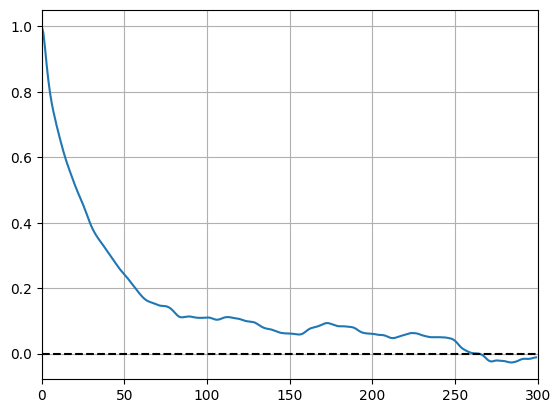

In [36]:
plt.plot(autocorTime, autocor)
plt.plot(autocorTime, np.zeros(len(autocor)), '--k')
plt.grid()
plt.xlim([0, 300])